## WordCloud Based on Script of 'The Office'

Dataset Source: https://www.kaggle.com/datasets/nasirkhalid24/the-office-us-complete-dialoguetranscript

##### Install Necessary Missing Library

In [0]:
%sh
pip install wordcloud

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-249b4fe2-eba5-4694-8903-18da687fb43c/bin/python -m pip install --upgrade pip' command.


##### Import Necessary Libraries

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from os import path
from PIL import Image
import numpy as np
import os

import pyspark

from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql.functions import *
from pyspark.ml import Pipeline

from pyspark.ml.feature import CountVectorizer, StopWordsRemover, RegexTokenizer

##### Create Function to Ingest Data

In [0]:
def import_dataset(file, schema_def):
    file_type = "csv"

    # CSV options
    infer_schema = "false"
    first_row_is_header = "true"
    delimiter = ","

    # The applied options are for CSV files. For other file types, these will be ignored.
    dataset = spark.read.format(file_type) \
      .option("inferSchema", infer_schema) \
      .option("header", first_row_is_header) \
      .option("sep", delimiter) \
      .schema(schema_def)\
      .load(file)
    
    dataset = dataset.drop("season", "episode", "title", "scene", "speaker")
    
    return dataset

##### Ingest Data Using Above Defined Function

In [0]:
file_location = "/FileStore/tables/The_Office_Lines_V4.csv"

schema = StructType([
    StructField("season", StringType(), True),
    StructField("episode", StringType(), True),
    StructField("title", StringType(), True),
    StructField("scene", StringType(), True),
    StructField("speaker", StringType(), True),
    StructField("line", StringType(), True),
    StructField("line_pt2", StringType(), True),
])

df = import_dataset(file_location, schema)

display(df)

line,line_pt2
All right Jim. Your quarterlies look very good. How are things at the library?,null
"Oh, I told you. I couldn't close it. So...",null
"So you've come to the master for guidance? Is this what you're saying, grasshopper?",null
"Actually, you called me in here, but yeah.",null
"All right. Well, let me show you how it's done.",null
"Yes, I'd like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. All right. Done deal. Thank you very much, sir. You're a gentleman and a scholar. Oh, I'm sorry. OK. I'm sorry. My mistake. That was a woman I was talking to, so... She had a very low voice. Probably a smoker, so... So that's the way it's done.",null
"I've, uh, I've been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you want to come through here... See we have the entire floor. So this is my kingdom, as far as the eye can see. This is our receptionist, Pam. Pam! Pam-Pam! Pam Beesly. Pam has been with us for... forever. Right, Pam?",null
Well. I don't know.,null
"If you think she's cute now, you should have seen her a couple of years ago.",null
What?,null


##### Append Both Feature Columns

In [0]:
line_1 = df.select("line")
line_2 = df.select("line_pt2")

ds = line_1.union(line_2)
ds = ds.na.drop()
display(ds)

line
All right Jim. Your quarterlies look very good. How are things at the library?
"Oh, I told you. I couldn't close it. So..."
"So you've come to the master for guidance? Is this what you're saying, grasshopper?"
"Actually, you called me in here, but yeah."
"All right. Well, let me show you how it's done."
"Yes, I'd like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. All right. Done deal. Thank you very much, sir. You're a gentleman and a scholar. Oh, I'm sorry. OK. I'm sorry. My mistake. That was a woman I was talking to, so... She had a very low voice. Probably a smoker, so... So that's the way it's done."
"I've, uh, I've been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you want to come through here... See we have the entire floor. So this is my kingdom, as far as the eye can see. This is our receptionist, Pam. Pam! Pam-Pam! Pam Beesly. Pam has been with us for... forever. Right, Pam?"
Well. I don't know.
"If you think she's cute now, you should have seen her a couple of years ago."
What?


##### Define Pipeline Stages

In [0]:
regexTokenizer = RegexTokenizer(inputCol="line", outputCol="words", pattern='[A-Za-z0-9\']+', gaps=False)

stopword_remover = StopWordsRemover(inputCol="words", outputCol="filtered")

cv = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=3, minDF=2.0)

##### Create Pipeline

In [0]:
wordcloud_pipe = Pipeline().setStages([regexTokenizer, stopword_remover, cv])

##### Fit & Transform Pipeline to Return Individual Words; Display Results

In [0]:
words = wordcloud_pipe.fit(ds).transform(ds)

display(words)

line,words,filtered,features
All right Jim. Your quarterlies look very good. How are things at the library?,"List(all, right, jim, your, quarterlies, look, very, good, how, are, things, at, the, library)","List(right, jim, quarterlies, look, good, things, library)","Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List())"
"Oh, I told you. I couldn't close it. So...","List(oh, i, told, you, i, couldn't, close, it, so)","List(oh, told, close)","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
"So you've come to the master for guidance? Is this what you're saying, grasshopper?","List(so, you've, come, to, the, master, for, guidance, is, this, what, you're, saying, grasshopper)","List(come, master, guidance, saying, grasshopper)","Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List())"
"Actually, you called me in here, but yeah.","List(actually, you, called, me, in, here, but, yeah)","List(actually, called, yeah)","Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List())"
"All right. Well, let me show you how it's done.","List(all, right, well, let, me, show, you, how, it's, done)","List(right, well, let, show, done)","Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List())"
"Yes, I'd like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. All right. Done deal. Thank you very much, sir. You're a gentleman and a scholar. Oh, I'm sorry. OK. I'm sorry. My mistake. That was a woman I was talking to, so... She had a very low voice. Probably a smoker, so... So that's the way it's done.","List(yes, i'd, like, to, speak, to, your, office, manager, please, yes, hello, this, is, michael, scott, i, am, the, regional, manager, of, dunder, mifflin, paper, products, just, wanted, to, talk, to, you, manager, a, manger, all, right, done, deal, thank, you, very, much, sir, you're, a, gentleman, and, a, scholar, oh, i'm, sorry, ok, i'm, sorry, my, mistake, that, was, a, woman, i, was, talking, to, so, she, had, a, very, low, voice, probably, a, smoker, so, so, that's, the, way, it's, done)","List(yes, like, speak, office, manager, please, yes, hello, michael, scott, regional, manager, dunder, mifflin, paper, products, wanted, talk, manager, manger, right, done, deal, thank, much, sir, gentleman, scholar, oh, sorry, ok, sorry, mistake, woman, talking, low, voice, probably, smoker, way, done)","Map(vectorType -> sparse, length -> 3, indices -> List(0, 2), values -> List(1.0, 1.0))"
"I've, uh, I've been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you want to come through here... See we have the entire floor. So this is my kingdom, as far as the eye can see. This is our receptionist, Pam. Pam! Pam-Pam! Pam Beesly. Pam has been with us for... forever. Right, Pam?","List(i've, uh, i've, been, at, dunder, mifflin, for, 12, years, the, last, four, as, regional, manager, if, you, want, to, come, through, here, see, we, have, the, entire, floor, so, this, is, my, kingdom, as, far, as, the, eye, can, see, this, is, our, receptionist, pam, pam, pam, pam, pam, beesly, pam, has, been, with, us, for, forever, right, pam)","List(uh, dunder, mifflin, 12, years, last, four, regional, manager, want, come, see, entire, floor, kingdom, far, eye, see, receptionist, pam, pam, pam, pam, pam, beesly, pam, us, forever, right, pam)","Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List())"
Well. I don't know.,"List(well, i, don't, know)","List(well, know)","Map(vectorType -> sparse, length -> 3, indices -> List(1), values -> List(1.0))"
"If you think she's cute now, you should have seen her a couple of years ago.","List(if, you, think, she's, cute, now, you, should, have, seen, her, a, couple, of, years, ago)","List(think, cute, seen, couple, years, ago)","Map(vectorType -> sparse, length -> 

##### Retrieve Unique Words & Count of Times in Script

In [0]:
words = words.withColumn('words_only', explode(col('filtered')))\
    .groupBy('words_only')\
    .count()\
    .sort('count', ascending=False)\
    .head(100)

display(words)

words_only,count
oh,3950
know,3931
like,2959
yeah,2905
okay,2616
right,2422
get,2316
well,2251
hey,2203
go,2152


##### Convert From Column of Words to String List (Separated by Space)

In [0]:
inputs = ""

for word in words:
    inputs += word['words_only']
    inputs += " "
    print(word['words_only'])

oh
know
like
yeah
okay
right
get
well
hey
go
think
good
one
michael
really
going
want
yes
uh
ok
gonna
dwight
come
got
see
jim
time
back
say
need
pam
great
thank
look
guys
um
people
take
little
make
mean
sorry
tell
us
way
god
man
thing
day
something
work
love
two
please
andy
much
office
said
let
call
maybe
alright
never
wait
new
sure
talk
give
nice
actually
stop
even
lot
thought
put
guy
wow
today
big
ever
first
anything
job
things
feel
hi
thanks
everyone
fine
three
everybody
party
better
last
kind
still
paper
hello
ah
best


##### Generate & Display WordCloud

Out[11]: <matplotlib.image.AxesImage at 0x7f14b275cd00>

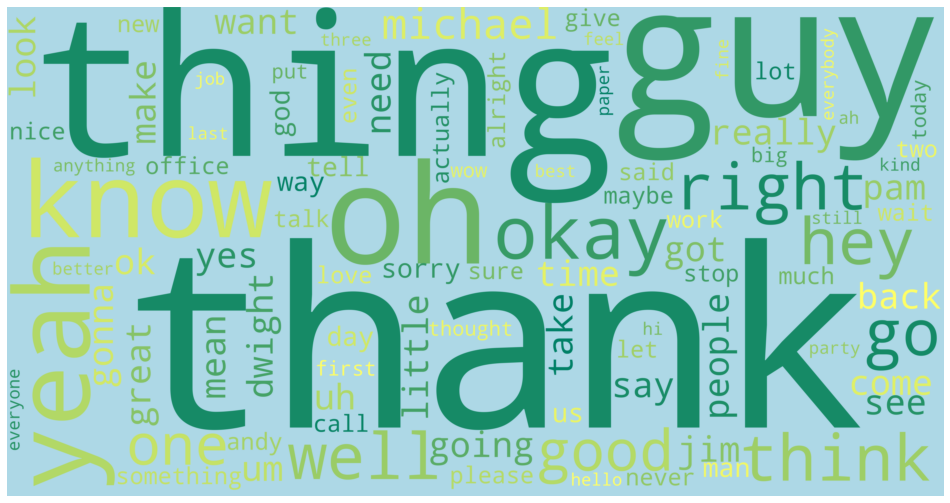

In [0]:
# Generate a word cloud image
wordcloud = WordCloud(scale=10,
                      background_color="lightblue",
                      height=627,
                      width=1200,
                      random_state=42,
                      colormap="summer"
             ).generate(inputs)

# Use Matplotlib to display word cloud
plt.figure(figsize=(18,9))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')